In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor


In [42]:
data = pd.read_csv('weight-height.csv')

In [43]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Outliers

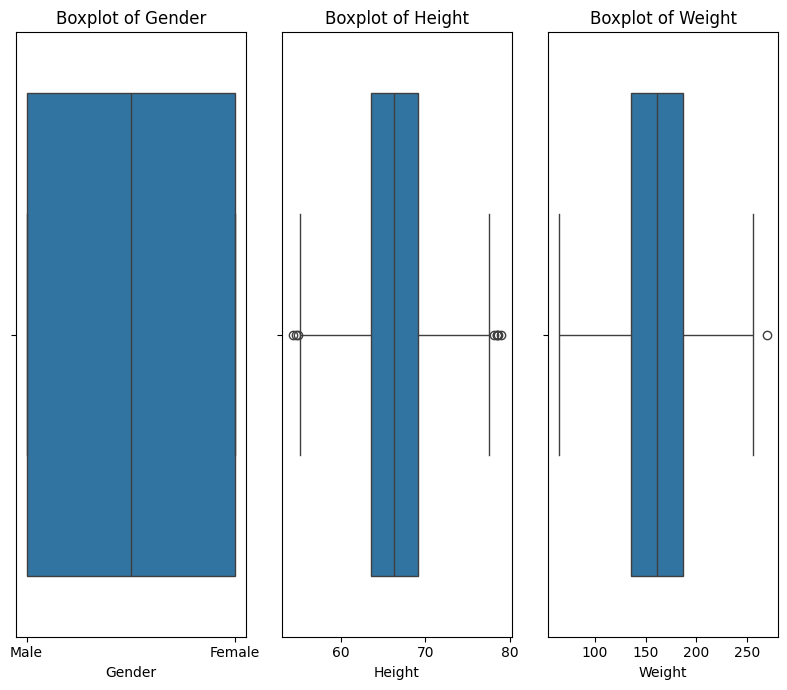

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 7))

# Her sütun için boxplot oluşturma
for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Aralarındaki boşluğu ayarlama
plt.tight_layout()
plt.show()

In [12]:
q1 = data["Height"].quantile(0.25)
q3 = data["Height"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [13]:
data[(data["Height"] < low) | (data["Height"] > up)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [14]:
data[(data["Height"] < low) | (data["Height"] > up)].index

Index([994, 1317, 2014, 3285, 3757, 6624, 7294, 9285], dtype='int64')

In [15]:
data[(data["Height"] < low) | (data["Height"] > up)].any(axis=None)

True

In [16]:
data[(data["Height"] < low)].any(axis=None)

True

###### function

In [17]:
def outlier_range(dataframe,col_name,q1=0.25,q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
outlier_range(data, "Height")

(55.00265861279534, 77.67722359525831)

In [20]:
outlier_range(data, "Weight")

(58.79084096072856, 264.19673521345646)

In [33]:
def remove_outlier(dataframe,col_name):
    low, up = outlier_range(dataframe, col_name,q1=0.25,q3=0.75)
    outlier_indices = dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].index
    dataframe_cleaned = dataframe.drop(outlier_indices)
    return dataframe_cleaned

In [34]:
cleaned_data = remove_outlier(data, "Height")

In [35]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_range(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [36]:
check_outlier(cleaned_data,"Height")

False

In [38]:
check_outlier(cleaned_data,"Weight")

False

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
        # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car